In [97]:
%%capture
!pip install bs4;
!pip install pandas;
!pip install geopandas;
!pip install matplotlib;
!pip install folium;

In [98]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium as fl
import os

In [99]:
subject = 'junior data analyst'
place = 'Canada'

In [100]:
web_pages = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, 0)
req = requests.get(web_pages)
soup = BeautifulSoup(req.text, "html.parser")

In [101]:
actual_page = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+1])
total_pages = int(soup.find(id="searchCountPages").text.split(' ')[soup.find(id="searchCountPages").text.split(' ').index('Page')+3].replace(',',''))

In [102]:
name = []
company = []
location = []

In [103]:
total_pages

37

In [104]:
for i in range(total_pages):
    print('Page {}'.format(i+1))
    if i%10 == 0:
        time.sleep(5)
    link_offers = 'https://ca.indeed.com/jobs?q={}&l={}&start={}'.format(subject, place, i*10)
    req = requests.get(link_offers)
    soup = BeautifulSoup(req.text, "html.parser")
    for job_offer in soup.find_all("div", "jobsearch-SerpJobCard unifiedRow row result"):
        name.append(job_offer.a['title'])
        company.append(job_offer.find('span','company').text.strip())
        try:
            location.append(job_offer.find('span','location accessible-contrast-color-location').text.strip())
        except:
            location.append(job_offer.find('span','remote').text.strip())

Page 1
Page 2
Page 3
Page 4
Page 5
Page 6
Page 7
Page 8
Page 9
Page 10
Page 11
Page 12
Page 13
Page 14
Page 15
Page 16
Page 17
Page 18
Page 19
Page 20
Page 21
Page 22
Page 23
Page 24
Page 25
Page 26
Page 27
Page 28
Page 29
Page 30
Page 31
Page 32
Page 33
Page 34
Page 35
Page 36
Page 37


In [105]:
df = pd.DataFrame(data=zip(name, company, location), columns=["Name", "Company", 'Location'])

In [107]:
df.Location.value_counts().to_dict()

{'Toronto, ON': 170,
 'Calgary, AB': 38,
 'Mississauga, ON': 36,
 'Edmonton, AB': 35,
 'Victoria, BC': 35,
 'Burnaby, BC': 33,
 'Pointe-Claire, QC': 33,
 'Remote': 33,
 'Montréal, QC': 31,
 'Vancouver, BC': 30,
 'Niagara Falls, ON': 29,
 'London, ON': 2,
 'Laval, QC': 2,
 'Winnipeg, MB': 1,
 'Markham, ON': 1,
 'Waterloo, ON': 1,
 'Oakville, ON': 1,
 'Mont-Saint-Hilaire, QC': 1}

In [108]:
df['Province'] = df.Location.apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'No data')

In [109]:
count_provinces = df.Province.value_counts().to_dict()

In [110]:
provinces = gpd.read_file(os.path.join(os.getcwd(), 'Data/lpr_000b16a_e/lpr_000b16a_e.shp'))    

In [111]:
provinces['prefix'] = ['NL','PEI','NS','NB','QC','ON','MB','SK','AB','BC','YK','NWT','NT']

In [112]:
provinces['Frecuency'] = provinces['prefix'].apply(lambda x: count_provinces[x] if x in count_provinces.keys() else 0)

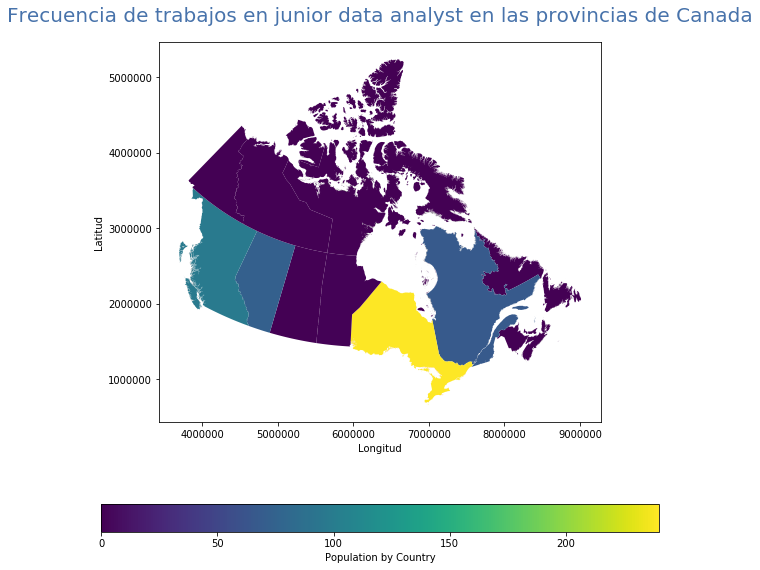

In [113]:
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejes
ax.set_title('Frecuencia de trabajos en {} en las provincias de Canada'.format(subject), 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
provinces.plot(column='Frecuency', cmap='viridis', ax=ax, zorder=5, legend=True, 
               legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})

In [114]:
location

['Calgary, AB',
 'Waterloo, ON',
 'London, ON',
 'Winnipeg, MB',
 'Oakville, ON',
 'Laval, QC',
 'Laval, QC',
 'Vancouver, BC',
 'London, ON',
 'Calgary, AB',
 'Mont-Saint-Hilaire, QC',
 'Markham, ON',
 'Mississauga, ON',
 'Toronto, ON',
 'Montréal, QC',
 'Montréal, QC',
 'Calgary, AB',
 'Montréal, QC',
 'Vancouver, BC',
 'Toronto, ON',
 'Niagara Falls, ON',
 'Burnaby, BC',
 'Pointe-Claire, QC',
 'Remote',
 'Calgary, AB',
 'Toronto, ON',
 'Toronto, ON',
 'Edmonton, AB',
 'Toronto, ON',
 'Mississauga, ON',
 'Victoria, BC',
 'Toronto, ON',
 'Vancouver, BC',
 'Montréal, QC',
 'Toronto, ON',
 'Niagara Falls, ON',
 'Remote',
 'Pointe-Claire, QC',
 'Burnaby, BC',
 'Calgary, AB',
 'Toronto, ON',
 'Toronto, ON',
 'Toronto, ON',
 'Edmonton, AB',
 'Mississauga, ON',
 'Victoria, BC',
 'Toronto, ON',
 'Remote',
 'Burnaby, BC',
 'Calgary, AB',
 'Toronto, ON',
 'Toronto, ON',
 'Toronto, ON',
 'Mississauga, ON',
 'Edmonton, AB',
 'Victoria, BC',
 'Toronto, ON',
 'Montréal, QC',
 'Vancouver, BC',
 'To

In [115]:
"""m = folium.Map(location=[58, -102], zoom_start=3)

folium.Choropleth(
    geo_data=provinces,
    name='choropleth',
    data=provinces,
    columns=['prefix', 'Frecuency'],
    key_on='feature.properties.prefix',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Geomatics job offering'
).add_to(m)

folium.LayerControl().add_to(m)

m"""

"m = folium.Map(location=[58, -102], zoom_start=3)\n\nfolium.Choropleth(\n    geo_data=provinces,\n    name='choropleth',\n    data=provinces,\n    columns=['prefix', 'Frecuency'],\n    key_on='feature.properties.prefix',\n    fill_color='YlOrRd',\n    fill_opacity=0.7,\n    line_opacity=0.2,\n    legend_name='Geomatics job offering'\n).add_to(m)\n\nfolium.LayerControl().add_to(m)\n\nm"